# Multi-view Diffusion

Multi-view diffusion is a type of diffusion model that turns an image of an object into multiple views of that object.

## Setup

Install the required libraries.

Here, we use a custom [requirements file](https://huggingface.co/spaces/dylanebert/multi-view-diffusion/blob/main/requirements.txt) to install a large number of dependencies. This is because the [Diffusers](https://huggingface.co/docs/diffusers/en/index) library doesn't officially support multi-view diffusion.

In [4]:
!pip install -r https://huggingface.co/spaces/dylanebert/multi-view-diffusion/raw/main/requirements.txt

ERROR: Operation cancelled by user


## Pipeline

In [ ]:
import os
os.kill(os.getpid(), 9)

In [2]:
# Conflicts with huggingface-hub==0.22.2
!pip uninstall -y peft

Create a multi-view diffusion pipeline. Diffusers doesn't officially support multi-view-diffusion, so we load a [custom pipeline](https://huggingface.co/docs/diffusers/v0.6.0/en/using-diffusers/custom_pipelines).

In [3]:
import torch
from diffusers import DiffusionPipeline

multi_view_diffusion_pipeline = DiffusionPipeline.from_pretrained(
    "dylanebert/multi-view-diffusion",
    custom_pipeline="dylanebert/multi-view-diffusion",
    torch_dtype=torch.float16,
    trust_remote_code=True,
).to("cuda")

Keyword arguments {'trust_remote_code': True} are not expected by MVDreamPipeline and will be ignored.


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

In [4]:
import huggingface_hub
print(huggingface_hub.__file__)
print(huggingface_hub.__version__)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/__init__.py
0.22.2


Load the input image.

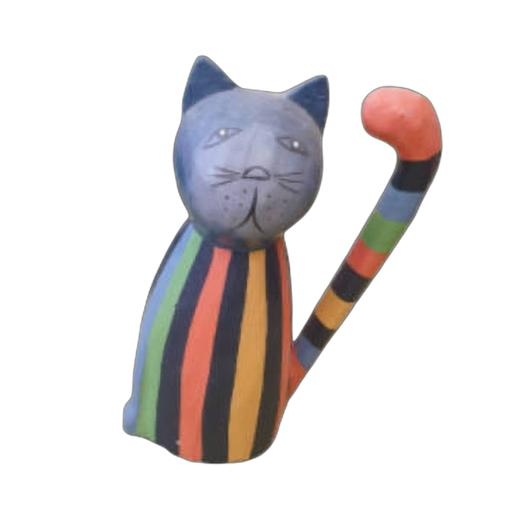

In [5]:
import requests
from PIL import Image
from io import BytesIO


image_url = "https://huggingface.co/datasets/dylanebert/3d-arena/resolve/main/inputs/images/a_cat_statue.jpg"
response = requests.get(image_url)
image = Image.open(BytesIO(response.content))
image

Pass the image through the multi-view diffusion pipeline.

  0%|          | 0/30 [00:00<?, ?it/s]

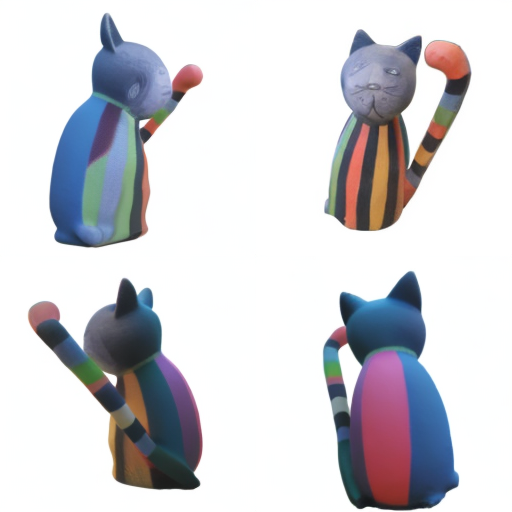

In [6]:
import numpy as np

def create_image_grid(images):
    images = [Image.fromarray((img * 255).astype("uint8")) for img in images]

    width, height = images[0].size
    grid_img = Image.new("RGB", (2 * width, 2 * height))

    grid_img.paste(images[0], (0, 0))
    grid_img.paste(images[1], (width, 0))
    grid_img.paste(images[2], (0, height))
    grid_img.paste(images[3], (width, height))

    return grid_img

image = np.array(image, dtype=np.float32) / 255.0
images = multi_view_diffusion_pipeline("", image, guidance_scale=5, num_inference_steps=30, elevation=0)

create_image_grid(images)

## Gradio Demo

In [ ]:
import gradio as gr

def run(image):
  image = np.array(image, dtype=np.float32) / 255.0
  images = multi_view_diffusion_pipeline("", image, guidance_scale=5, num_inference_steps=30, elevation=0)

  images = [Image.fromarray((img * 255).astype("uint8")) for img in images]

  width, height = images[0].size
  grid_img = Image.new("RGB", (2 * width, 2 * height))

  grid_img.paste(images[0], (0, 0))
  grid_img.paste(images[1], (width, 0))
  grid_img.paste(images[2], (0, height))
  grid_img.paste(images[3], (width, height))

  return grid_img

demo = gr.Interface(fn=run, inputs="image", outputs="image")
demo.launch()

Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
IMPORTANT: You are using gradio version 4.24.0, however version 4.29.0 is available, please upgrade.
--------
Running on public URL: https://565bb446d7df3075dc.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
